# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

(Please insert the background here )


## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [2]:
import requests

url_get = requests.get('https://www.imdb.com/search/title/?release_date=2019-01-01,2019-12-31')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [3]:
url_get.content[1:777]

b'\n<!DOCTYPE html>\n<html\n    xmlns:og="http://ogp.me/ns#"\n    xmlns:fb="http://www.facebook.com/2008/fbml">\n    <head>\n         \n        <meta charset="utf-8">\n        <meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///?src=mdot">\n\n\n\n        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:\'java\'};</script>\n\n<script>\n    if (typeof uet == \'function\') {\n      uet("bb", "LoadTitle", {wb: 1});\n    }\n</script>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>\n        <title>Released between 2019-01-01 and 2019-12-31\n(Sorted by Popularity Ascending) - IMDb</title>\n  <script>(function(t)'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [4]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [5]:
movie_containers = soup.find_all('div', class_ = 'lister-item mode-advanced')
print(type(movie_containers))
print(len(movie_containers))

<class 'bs4.element.ResultSet'>
50


Do the scrapping process here (please change this markdown with your explanation)

In [6]:
# Lists to store the scraped data in
names = []
years = []
imdb_ratings = []
votes = []
genres = []
durations = []

# Extract data from individual movie container
for container in movie_containers:
# If the movie has Metascore, then extract:
    if container.find('div') is not None:

        # The name
        name = container.h3.a.text
        names.append(name)

        # The year
        year = container.h3.find('span', class_ = 'lister-item-year').text
        years.append(year)
        
        #duration
        duration = container.p.find('span', class_ = 'runtime').text
        durations.append(duration)
        
        #genres
        genre = container.p.find('span', class_ = 'genre').text
        genres.append(genre)

        # The IMDB rating
        imdb = float(container.strong.text)
        imdb_ratings.append(imdb)

        # The number of votes
        vote = container.find('span', attrs = {'name':'nv'})['data-value']
        votes.append(int(vote))

## Creating data frame & Data wrangling

Put the array into dataframe

In [7]:
import pandas as pd
df = pd.DataFrame({'movie': names,
'durasi(menit)': durations,
'genre': genres,
'year': years,
'imdb': imdb_ratings,
'votes': votes
})
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie          50 non-null     object 
 1   durasi(menit)  50 non-null     object 
 2   genre          50 non-null     object 
 3   year           50 non-null     object 
 4   imdb           50 non-null     float64
 5   votes          50 non-null     int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 2.5+ KB
None


,movie,durasi(menit),genre,year,imdb,votes
0,The Mandalorian,40 min,"\nAction, Adventure, Sci-Fi",(2019– ),8.8,296878
1,For All Mankind,60 min,"\nDrama, Sci-Fi",(2019– ),7.7,13906
2,The Boys,60 min,"\nAction, Comedy, Crime",(2019– ),8.7,251642
3,Avengers: Endgame,181 min,"\nAction, Adventure, Drama",(2019),8.4,827454
4,The Witcher,60 min,"\nAction, Adventure, Fantasy",(2019– ),8.2,303278


Do the data cleaning here (please change this markdown with your explanation of what you do for data wrangling)

In [8]:
df['year'] = df['year'].str.replace(")", "")
df['year'] = df['year'].str.replace("(", "")
df['year'] = df['year'].str.replace("–", "")

df['durasi(menit)'] = df['durasi(menit)'].str.replace(" min", "")

df['genre'] = df['genre'].str.replace("\n", "")


    
df.head()


/home/malik/anaconda3/envs/python-capstone/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.
/home/malik/anaconda3/envs/python-capstone/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  


,movie,durasi(menit),genre,year,imdb,votes
0,The Mandalorian,40,"Action, Adventure, Sci-Fi",2019,8.8,296878
1,For All Mankind,60,"Drama, Sci-Fi",2019,7.7,13906
2,The Boys,60,"Action, Comedy, Crime",2019,8.7,251642
3,Avengers: Endgame,181,"Action, Adventure, Drama",2019,8.4,827454
4,The Witcher,60,"Action, Adventure, Fantasy",2019,8.2,303278


In [11]:
df['total_rating'] = df['imdb']*df['votes']

<AxesSubplot:ylabel='movie'>

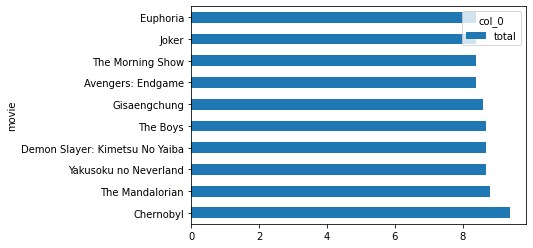

In [18]:
#10 Movie Terbaik-berdasarakan rating
top10 = pd.crosstab(
    index = df['movie'],
    columns = 'total',
    values = df['imdb'],
    aggfunc = 'sum'
).sort_values('total', ascending = False)

top10.head(10).plot.barh()

<AxesSubplot:ylabel='movie'>

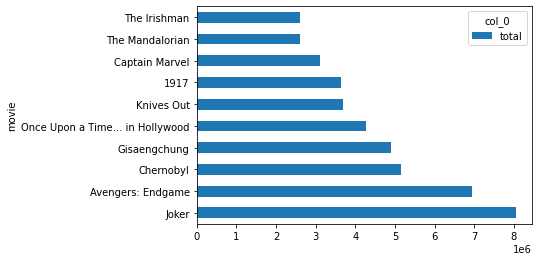

In [17]:
#10 Movie Terbaik-berdasarakan jumlah rating terbanyak (votes*imdb)
top10_rating = pd.crosstab(
    index = df['movie'],
    columns = 'total',
    values = df['total_rating'],
    aggfunc = 'sum'
).sort_values('total', ascending = False)

top10.head(10).plot.barh()

### Intepretasi

- pada score `imdb` film joker berada pada urutan ke-9 sedangkan untuk peringkat pertama diduduki oleh chernobyl
- jika berdasarkan `total_rating` justru <b>joker</b> menempati posisi pertama sedangkan chernobyl berada di peringkat ke-3
- ada beberapa film yang masuk top10 berdasarkan `imdb` namun tidak masuk top10 berdasarkan `total_rating` seperti <b> kimetsu no yaiba, yakushoku no neverland, the boys, dll</b>. jika dilihat secara kasar hal ini berarti film tersebut mempunyai `votes` yang sedikit namun setiap orang memberikan nilai/rating yang tinggi

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 


(Put your analysis and conclusion here.)

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.